### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: >

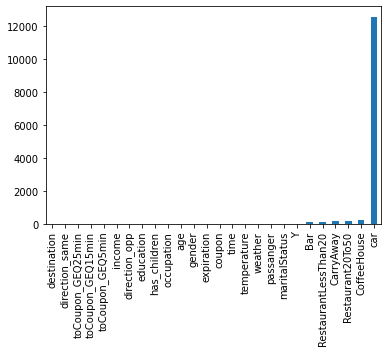

In [ ]:
#Let us check to see what columns have null values
data.isnull().sum().sort_values().plot(kind="bar")

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# We can clearly see that the car column has 99% null values.
sum(data["car"].isna())/data.shape[0]

0.9914853358561968

<Axes: >

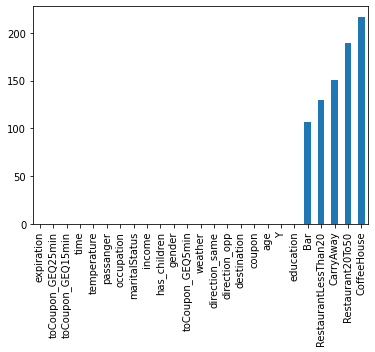

In [8]:
# Since the car column is severely skewing the nulls graph, let us get rid of that column and see what other columns have null values
data[data.columns.difference(['car'])].isnull().sum().sort_values().plot(kind="bar")

**Observation: ** Just 5 columns have null values in them. And they all have between 1% - 2% of their rows having null values. 
We can drop null rows as we see fit at later stages

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
# Since Y == 1 is all observations which accepted, we can use the sum on this column to get a count of all observations who accepted the coupon
sum(data["Y"])/data.shape[0]

0.5684326710816777

So, a total of _**~57%**_ of the observations accepted the coupons

5. Use a bar plot to visualize the `coupon` column.

/var/folders/rn/58p9sk3d243d5bx2vbqp67900000gn/T/ipykernel_23511/2787043946.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=data["coupon"].unique(),rotation=30)


[Text(0, 0, 'Restaurant(<20)'),
 Text(1, 0, 'Coffee House'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

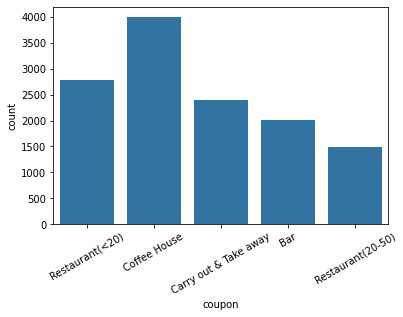

In [10]:
fig = sns.countplot(x="coupon", data = data)
# Rotate the labels as they would overlap otherwise
fig.set_xticklabels(labels=data["coupon"].unique(),rotation=30)

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

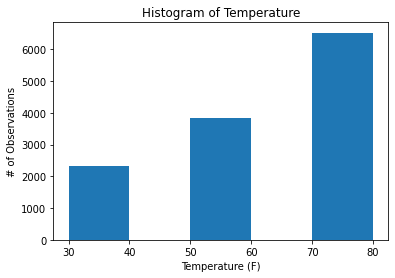

In [11]:
n_bins = 5    
plt.hist(data["temperature"], n_bins, histtype ='bar')
plt.xlabel('Temperature (F)')
plt.ylabel('# of Observations')
plt.title('Histogram of Temperature')

**Observation:** This is odd since there are no observations where the temperature is between 40-50, or 60-70. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_coupons = data.query("coupon == 'Bar'")
#Now since we will be dealing with Bar coupons heavily, let us go ahead and drop rows where the Bar column is null: 
bar_coupons = bar_coupons.dropna(subset=['Bar'])
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [13]:
sum(bar_coupons["Y"])/bar_coupons.shape[0]

0.4103206412825651

So, a total of _**41%**_ of the folks who were offered a bar coupon accepted it. This is lower compared to the overall average of _**56%**_

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
bar_goers = bar_coupons[["Bar","Y"]]
bar_goers.loc[(bar_goers.Bar == "never") | (bar_goers.Bar == "1~3") | (bar_goers.Bar == "less1"), "Bar"] = "<= 3 Times"
bar_goers.loc[(bar_goers.Bar == "4~8") | (bar_goers.Bar == "gt8"), "Bar"] = "> 3 Times"
#bar_goers.sample(20)
bar_goers = bar_goers.groupby("Bar").agg({"Bar": 'size', 'Y':'sum'})
bar_goers.rename(columns={"Bar":"total_count","Y":"acceptance_count"},inplace=True)
bar_goers = bar_goers.reset_index()
bar_goers["acceptance_percentage"] = bar_goers["acceptance_count"]/bar_goers["total_count"]*100
bar_goers

,Bar,total_count,acceptance_count,acceptance_percentage
0,<= 3 Times,1797,666,37.061770
1,> 3 Times,199,153,76.884422


([0, 1], [Text(0, 0, '<= 3 Times'), Text(1, 0, '> 3 Times')])

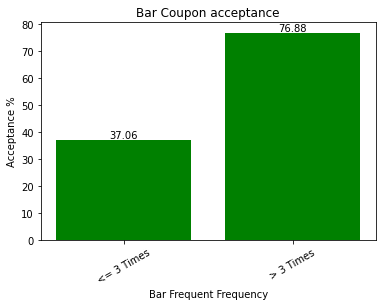

In [15]:
# Let us plot a bar graph to compare the 2 groups: 
bars = plt.bar(bar_goers["Bar"],bar_goers["acceptance_percentage"], color = 'green')
plt.bar_label(bars,np.round(bar_goers["acceptance_percentage"],decimals=2))
plt.xlabel("Bar Frequent Frequency")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance")
plt.xticks(rotation=30)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
bar_df = bar_coupons[["age","Bar","Y"]].copy()
bar_df["age"] = bar_df["age"].str.replace('50plus','50').str.replace("below21","20")
bar_df['age'] = pd.to_numeric(bar_df['age'])
bar_df['25_older_visit_bar_once_or_more'] = np.where(
    (bar_df['age'] > 25) & 
    ((bar_df['Bar'] == '1~3') | (bar_df['Bar'] == '4~8') | (bar_df['Bar'] == 'gt8'))
    , "Yes", "No")
#bar_df.sample(5)
bar_df = bar_df.groupby("25_older_visit_bar_once_or_more").agg({"25_older_visit_bar_once_or_more": 'size', 'Y':'sum'})
bar_df.rename(columns={"25_older_visit_bar_once_or_more":"total_count","Y":"acceptance_count"},inplace=True)
bar_df = bar_df.reset_index()
bar_df["acceptance_percentage"] = bar_df["acceptance_count"]/bar_df["total_count"]*100
bar_df

,25_older_visit_bar_once_or_more,total_count,acceptance_count,acceptance_percentage
0,No,1576,527,33.439086
1,Yes,420,292,69.523810


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

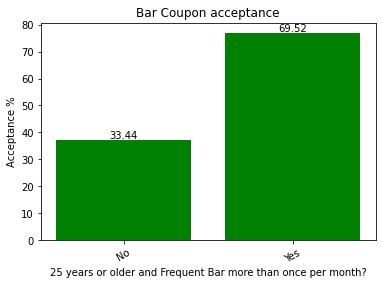

In [17]:
bars = plt.bar(bar_df["25_older_visit_bar_once_or_more"],bar_goers["acceptance_percentage"], color = 'green')
plt.bar_label(bars,np.round(bar_df["acceptance_percentage"],decimals=2))
plt.xlabel("25 years or older and Frequent Bar more than once per month?")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance")
plt.xticks(rotation=30)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
bar_df_05 = bar_coupons[["passanger","Bar","occupation","Y"]].copy()
bar_df_05['candidate'] = np.where(
    (bar_df_05['passanger'] != 'Kid(s)') & # drivers with no kid passengers
    ((bar_df_05['Bar'] == '1~3') | (bar_df_05['Bar'] == '4~8') | (bar_df_05['Bar'] == 'gt8')) & # Go to bar > once a month
    (bar_df_05['occupation'] != 'Farming Fishing & Forestry') # Are not in Farming, fishing, or forestry occupation
    , "Yes", "No")
#bar_df_05.sample(5)
bar_df_05 = bar_df_05.groupby("candidate").agg({"candidate": 'size', 'Y':'sum'})
bar_df_05.rename(columns={"candidate":"total_count","Y":"acceptance_count"},inplace=True)
bar_df_05 = bar_df_05.reset_index()
bar_df_05["acceptance_percentage"] = bar_df_05["acceptance_count"]/bar_df_05["total_count"]*100
bar_df_05

,candidate,total_count,acceptance_count,acceptance_percentage
0,No,1445,426,29.480969
1,Yes,551,393,71.324864


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

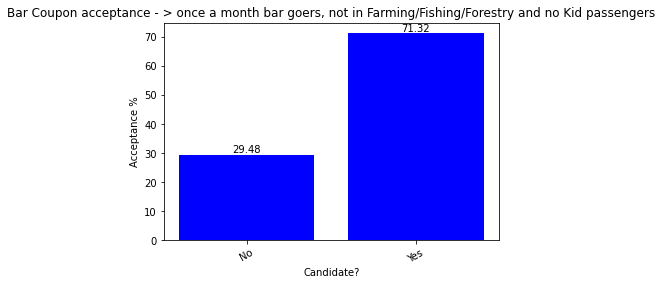

In [19]:
#Plot a graph to represent the acceptance
bars = plt.bar(bar_df_05["candidate"],bar_df_05["acceptance_percentage"], color = 'blue')
plt.bar_label(bars,np.round(bar_df_05["acceptance_percentage"],decimals=2))
plt.xlabel("Candidate?")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance - > once a month bar goers, not in Farming/Fishing/Forestry and no Kid passengers")
plt.xticks(rotation=30)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
# Let us extract dataframe and do some cleanup: 
bar_df_06 = bar_coupons[["maritalStatus","age","income","passanger","Bar","occupation","RestaurantLessThan20","Y"]].copy()

#Cleanup Age column and convert it to numeric:
bar_df_06["age"] = bar_df_06["age"].str.replace('50plus','50').str.replace("below21","20")
bar_df_06['age'] = pd.to_numeric(bar_df_06['age'])

#Let us split the income column into 2 numeric columns: lower_income and upper_income: 
bar_df_06["income"] = bar_df_06["income"].str.replace("$","")
# Let us first handle the 2 boundary conditions ""> 100,000" and "< 12,500"
bar_df_06["income"] = bar_df_06["income"].str.replace('100000 or More','100000 - 101000').str.replace("Less than 12500","0 - 12500")
bar_df_06[['lower_income','upper_income']] = bar_df_06.income.str.split(" - ", expand = True)
bar_df_06['lower_income'] = pd.to_numeric(bar_df_06['lower_income'])
bar_df_06['upper_income'] = pd.to_numeric(bar_df_06['upper_income'])
bar_df_06

/var/folders/rn/58p9sk3d243d5bx2vbqp67900000gn/T/ipykernel_23511/2306643659.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bar_df_06["income"] = bar_df_06["income"].str.replace("$","")


,maritalStatus,age,income,passanger,Bar,occupation,RestaurantLessThan20,Y,lower_income,upper_income
9,Unmarried partner,21,37500 - 49999,Kid(s),never,Unemployed,4~8,0,37500,49999
13,Unmarried partner,21,37500 - 49999,Alone,never,Unemployed,4~8,1,37500,49999
17,Unmarried partner,21,37500 - 49999,Alone,never,Unemployed,4~8,0,37500,49999
24,Single,21,62500 - 74999,Friend(s),never,Architecture & Engineering,4~8,1,62500,74999
35,Single,21,62500 - 74999,Alone,never,Architecture & Engineering,4~8,1,62500,74999
...,...,...,...,...,...,...,...,...,...,...
12663,Single,26,75000 - 87499,Friend(s),never,Sales & Related,4~8,0,75000,87499
12664,Single,26,75000 - 87499,Friend(s),never,Sales & Related,4~8,0,75000,87499
12667,Single,26,75000 - 87499,Alone,never,Sales & Related,4~8,0,75000,87499
12670,Single,26,75000 - 87499,Partner,never,Sales & Related,4~8,0,75000,87499


In [21]:
# Now, let us filter the interested candidates
bar_df_06['candidate'] = np.where(
    (
        ((bar_df_06['Bar'] == '1~3') | (bar_df_06['Bar'] == '4~8') | (bar_df_06['Bar'] == 'gt8')) & # Go to bar > once a month
        (
            ((bar_df_06['passanger'] != 'Kid(s)') & # drivers with no kid passengers
             (bar_df_06['maritalStatus'] != 'Widowed')) | # Were not Widowed
            (bar_df_06['age'] < 30) # Less than 30 years of age
        )
    ) | 
    (
        (bar_df_06["upper_income"] < 50_000) & #income is less than 50K
        ((bar_df_06['RestaurantLessThan20'] == '4~8') | (bar_df_06['RestaurantLessThan20'] == 'gt8')) # Went to cheap restaurants more than 4 times
    )
    , "Yes", "No")

bar_df_06.sample(5)
#Now let us calculate the acceptance percentage among the candidate group
bar_df_06 = bar_df_06.groupby("candidate").agg({"candidate": 'size', 'Y':'sum'})
bar_df_06.rename(columns={"candidate":"total_count","Y":"acceptance_count"},inplace=True)
bar_df_06 = bar_df_06.reset_index()
bar_df_06["acceptance_percentage"] = bar_df_06["acceptance_count"]/bar_df_06["total_count"]*100
bar_df_06

,candidate,total_count,acceptance_count,acceptance_percentage
0,No,1225,363,29.632653
1,Yes,771,456,59.143969


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

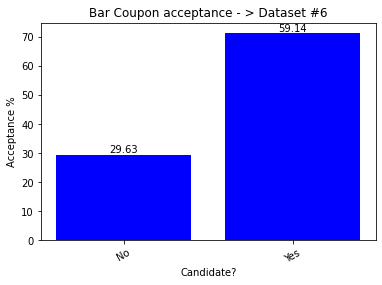

In [22]:
#Plot a graph to represent the acceptance
bars = plt.bar(bar_df_06["candidate"],bar_df_05["acceptance_percentage"], color = 'blue')
plt.bar_label(bars,np.round(bar_df_06["acceptance_percentage"],decimals=2))
plt.xlabel("Candidate?")
plt.ylabel("Acceptance %")
plt.title("Bar Coupon acceptance - > Dataset #6")
plt.xticks(rotation=30)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

-  You are <u>twice</u> as likely to accept a Bar coupon if you are: 
	-  frequent the bar more than three times a month, or
	-  above 25 years of age and frequent the bar more than once a month
	-  frequent the bar more than once a month, and are not employed in the Farming, Fishing, or Forestry industry, and also happen to not be travelling with kids as passengers. 
	-  frequent cheap resturants more than 4 times a month and earn less than 50K
-  Overall, there seems to be strong correlation between the number of times you visit a bar and your likelihood of accepting a bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
# I am curious to see what the percentage acceptance is for all kinds of coupons
coupons_aggregates = data.groupby("coupon").agg({"coupon": 'size', 'Y':'sum'})
coupons_aggregates.rename(columns={"coupon":"total_count","Y":"acceptance_count"},inplace=True)
coupons_aggregates = coupons_aggregates.reset_index()
coupons_aggregates["acceptance_percentage"] = coupons_aggregates["acceptance_count"]/coupons_aggregates["total_count"]*100
coupons_aggregates

,coupon,total_count,acceptance_count,acceptance_percentage
0,Bar,2017,827,41.001487
1,Carry out & Take away,2393,1760,73.547848
2,Coffee House,3996,1995,49.924925
3,Restaurant(20-50),1492,658,44.101877
4,Restaurant(<20),2786,1970,70.710696


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

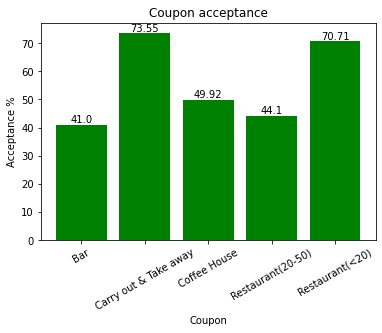

In [24]:
bars = plt.bar(coupons_aggregates["coupon"],coupons_aggregates["acceptance_percentage"], color = 'green')
plt.bar_label(bars,np.round(coupons_aggregates["acceptance_percentage"],decimals=2))
plt.xlabel("Coupon")
plt.ylabel("Acceptance %")
plt.title("Coupon acceptance")
plt.xticks(rotation=30)

**Observation:** Clearly, we can see that Carryout and Take Away and Restaurant(<20) coupons get used the most while Bar coupons get used the least. 

Also, I notice that we have the most data points available for Coffee House coupons (~ 4K) but still, our ability to predict whether someone will accept a cofffee house coupon or not is not better than our ability to predict the outcome of a coin toss. So, I would like to further investigate the coffee house coupons

In [25]:
# let me isolate the coffee house coupons
coffee_house = data.query("coupon == 'Coffee House'").copy()
coffee_house.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


#### Data Cleanup: 
-  Cleanup Age column and convert it into numeric. 
-  Convert time into a 24 hr clock
-  Convert income column into 2 columns: lower_income and upper_income

In [26]:
#Cleanup Age column and convert it to numeric:
coffee_house["age"] = coffee_house["age"].str.replace('50plus','50').str.replace("below21","20")
coffee_house['age'] = pd.to_numeric(coffee_house['age'])

#Let us split the income column into 2 numeric columns: lower_income and upper_income: 
coffee_house["income"] = coffee_house["income"].str.replace("$","")
# Let us first handle the 2 boundary conditions ""> 100,000" and "< 12,500"
coffee_house["income"] = coffee_house["income"].str.replace('100000 or More','100000 - 101000').str.replace("Less than 12500","0 - 12500")
coffee_house[['lower_income','upper_income']] = coffee_house.income.str.split(" - ", expand = True)
coffee_house['lower_income'] = pd.to_numeric(coffee_house['lower_income'])
coffee_house['upper_income'] = pd.to_numeric(coffee_house['upper_income'])
coffee_house

/var/folders/rn/58p9sk3d243d5bx2vbqp67900000gn/T/ipykernel_23511/2032675676.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coffee_house["income"] = coffee_house["income"].str.replace("$","")


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,lower_income,upper_income
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,gt8,less1,1,1,0,0,1,0,100000,101000
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,gt8,less1,1,0,0,1,0,0,100000,101000
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,4~8,1~3,1,0,0,1,0,0,75000,87499
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,4~8,1~3,1,1,0,0,1,0,75000,87499


In [27]:
# Let u define a helper function to convert time into 24 hr time
def convert_to_24hr_time(time):
    pm = time.endswith('PM') 
    nTime = pd.to_numeric(time.replace('AM','').replace('PM',''))
    return nTime+12 if pm else nTime

In [28]:
coffee_house['24HrTime'] = coffee_house['time'].apply(lambda t: convert_to_24hr_time(t))
coffee_house.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,lower_income,upper_income,24HrTime
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,37500,49999,10
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,37500,49999,14
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,37500,49999,14
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,37500,49999,18
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,37500,49999,18


In [29]:
coffee_house_time = coffee_house.groupby("24HrTime").agg({"24HrTime": 'size', 'Y':'sum'})
coffee_house_time.rename(columns={"24HrTime":"total_count","Y":"acceptance_count"},inplace=True)
coffee_house_time = coffee_house_time.reset_index()
coffee_house_time["acceptance_percentage"] = coffee_house_time["acceptance_count"]/coffee_house_time["total_count"]*100


fig = px.line(coffee_house_time, x="24HrTime", y="acceptance_percentage", title='Coffee House Coupon - acceptance by Time of Day')
fig.show()

**Observation: ** Coffee house coupons are most efficient if they are issued around 10 am. 

In [30]:
coffee_house_age = coffee_house.groupby("age").agg({"age": 'size', 'Y':'sum'})
coffee_house_age.rename(columns={"age":"total_count","Y":"acceptance_count"},inplace=True)
coffee_house_age = coffee_house_age.reset_index()
coffee_house_age["acceptance_percentage"] = coffee_house_age["acceptance_count"]/coffee_house_age["total_count"]*100


fig = px.line(coffee_house_age, x="age", y="acceptance_percentage", title='Coffee House Coupon - acceptance by Age')
fig.show()

Observation: Coffee house coupons are most likely to be accepted by individuals around 20 years old. For all other age groups, the acceptance rate remains relatively stable, ranging between 45% and 55%.